# Retrieve data

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.tsatools import (lagmat, add_trend)




In [1]:
import sqlite3

#Connecting to sqlite
conn = sqlite3.connect('DATABASE_Clean.db')

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''SELECT * from Sheet1''')

#Fetching 1st row from the table
result = cursor.fetchone();
print(result)

#Fetching 1st row from the table
result = cursor.fetchall();
print(result)

#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()

('2021-09-02 00:00:00', 1.1873, 109.92, 72.832, 0.9141, 6.4558, 8.2729, 1.3829, 3.7504, 1.2551, 0.7399, 49548.39, 3808.01, 489.05, 3.01, 128.94, 1.26761, 33.105, 0.2946921, 187.65, 1.44162)
[('2021-09-03 00:00:00', 1.1882, 109.73, 72.745, 0.9135, 6.4528, 8.3049, 1.3865, 3.7499, 1.2526, 0.7458, 50134.99, 3916.75, 488.72, 2.956, 148.58, 1.29213, 32.411, 0.2960285, 212.27, 1.46632), ('2021-09-06 00:00:00', 1.1868, 109.83, 72.949, 0.9148, 6.4542, 8.2771, 1.3834, 3.7503, 1.2537, 0.7439, 51915.11, 3953.62, 499.3, 2.848, 164.73, 1.39234, 34.201, 0.3089516, 222.2, 1.68266), ('2021-09-07 00:00:00', 1.1839, 110.27, 73.264, 0.9195, 6.4662, 8.3447, 1.3782, 3.7504, 1.2647, 0.7385, 46799.55, 3415.01, 411.07, 2.377, 166.8, 1.10638, 34.323, 0.2549711, 177.12, 1.36277), ('2021-09-08 00:00:00', 1.1813, 110.23, 73.1175, 0.922, 6.4612, 8.4597, 1.3768, 3.7505, 1.2689, 0.7364, 46053.24, 3471.25, 412.41, 2.377, 192.68, 1.08856, 28.013, 0.25686, 179.65, 1.33221), ('2021-09-09 00:00:00', 1.1825, 109.7, 72.95, 

In [4]:
data = pd.DataFrame(result, columns=['Date', 'EUR','JPY', 'RUB', 'CHF', 'CNY', 'TRY', 'GBP', 'SAR', 'CAD', 'AUD', 'BTC', 'ETH', 'BNB', 'ADA', 'SOL', 'XRP', 'BFNX', 'DOGE', 'LTC', 'POLY'])
data

,Date,EUR,JPY,RUB,CHF,CNY,TRY,GBP,SAR,CAD,...,BTC,ETH,BNB,ADA,SOL,XRP,BFNX,DOGE,LTC,POLY
0,2021-09-03 00:00:00,1.1882,109.73,72.7450,0.9135,6.4528,8.3049,1.3865,3.7499,1.2526,...,50134.99,3916.75,488.72,2.956,148.58,1.29213,32.411,0.296029,212.27,1.46632
1,2021-09-06 00:00:00,1.1868,109.83,72.9490,0.9148,6.4542,8.2771,1.3834,3.7503,1.2537,...,51915.11,3953.62,499.30,2.848,164.73,1.39234,34.201,0.308952,222.20,1.68266
2,2021-09-07 00:00:00,1.1839,110.27,73.2640,0.9195,6.4662,8.3447,1.3782,3.7504,1.2647,...,46799.55,3415.01,411.07,2.377,166.80,1.10638,34.323,0.254971,177.12,1.36277
3,2021-09-08 00:00:00,1.1813,110.23,73.1175,0.9220,6.4612,8.4597,1.3768,3.7505,1.2689,...,46053.24,3471.25,412.41,2.377,192.68,1.08856,28.013,0.256860,179.65,1.33221
4,2021-09-09 00:00:00,1.1825,109.70,72.9500,0.9168,6.4514,8.4305,1.3835,3.7503,1.2662,...,46240.73,3430.64,422.02,2.526,195.09,1.08820,28.015,0.252466,180.32,1.35993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2022-03-28 00:00:00,1.0978,123.91,87.5000,0.9338,6.3714,14.8046,1.3084,3.7513,1.2519,...,47971.25,3418.24,434.28,1.201,110.06,0.89850,21.973,0.142307,131.34,1.66484
147,2022-03-29 00:00:00,1.1085,122.84,80.0000,0.9313,6.3602,14.5665,1.3084,3.7525,1.2502,...,47465.50,3398.67,433.15,1.175,111.19,0.86138,22.447,0.144602,129.05,1.67491
148,2022-03-30 00:00:00,1.1156,121.80,76.0000,0.9232,6.3470,14.6503,1.3131,3.7516,1.2480,...,47289.19,3413.73,442.76,1.192,120.23,0.86106,22.432,0.142853,132.04,1.68536
149,2022-03-31 00:00:00,1.1065,121.66,79.2500,0.9226,6.3393,14.6700,1.3133,3.7514,1.2499,...,45769.00,3300.47,429.87,1.159,124.19,0.81638,21.343,0.138112,124.85,1.61575


In [5]:
data.set_index('Date', inplace = True)
data

,EUR,JPY,RUB,CHF,CNY,TRY,GBP,SAR,CAD,AUD,BTC,ETH,BNB,ADA,SOL,XRP,BFNX,DOGE,LTC,POLY
Date,,,,,,,,,,,,,,,,,,,,
2021-09-03 00:00:00,1.1882,109.73,72.7450,0.9135,6.4528,8.3049,1.3865,3.7499,1.2526,0.7458,50134.99,3916.75,488.72,2.956,148.58,1.29213,32.411,0.296029,212.27,1.46632
2021-09-06 00:00:00,1.1868,109.83,72.9490,0.9148,6.4542,8.2771,1.3834,3.7503,1.2537,0.7439,51915.11,3953.62,499.30,2.848,164.73,1.39234,34.201,0.308952,222.20,1.68266
2021-09-07 00:00:00,1.1839,110.27,73.2640,0.9195,6.4662,8.3447,1.3782,3.7504,1.2647,0.7385,46799.55,3415.01,411.07,2.377,166.80,1.10638,34.323,0.254971,177.12,1.36277
2021-09-08 00:00:00,1.1813,110.23,73.1175,0.9220,6.4612,8.4597,1.3768,3.7505,1.2689,0.7364,46053.24,3471.25,412.41,2.377,192.68,1.08856,28.013,0.256860,179.65,1.33221
2021-09-09 00:00:00,1.1825,109.70,72.9500,0.9168,6.4514,8.4305,1.3835,3.7503,1.2662,0.7366,46240.73,3430.64,422.02,2.526,195.09,1.08820,28.015,0.252466,180.32,1.35993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28 00:00:00,1.0978,123.91,87.5000,0.9338,6.3714,14.8046,1.3084,3.7513,1.2519,0.7487,47971.25,3418.24,434.28,1.201,110.06,0.89850,21.973,0.142307,131.34,1.66484
2022-03-29 00:00:00,1.1085,122.84,80.0000,0.9313,6.3602,14.5665,1.3084,3.7525,1.2502,0.7506,47465.50,3398.67,433.15,1.175,111.19,0.86138,22.447,0.144602,129.05,1.67491
2022-03-30 00:00:00,1.1156,121.80,76.0000,0.9232,6.3470,14.6503,1.3131,3.7516,1.2480,0.7509,47289.19,3413.73,442.76,1.192,120.23,0.86106,22.432,0.142853,132.04,1.68536


# Normality Tests

In [8]:
# Calculate Price Returns

df=pd.DataFrame(data)

for col in df.iteritems():
    df['Returns '+col[0]]=np.round((np.log(data[col[0]]) - np.log(data[col[0]]).shift(1)) * 100, 2)
    
df.head()


,EUR,JPY,RUB,CHF,CNY,TRY,GBP,SAR,CAD,AUD,...,Returns BTC,Returns ETH,Returns BNB,Returns ADA,Returns SOL,Returns XRP,Returns BFNX,Returns DOGE,Returns LTC,Returns POLY
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-03 00:00:00,1.1882,109.73,72.7450,0.9135,6.4528,8.3049,1.3865,3.7499,1.2526,0.7458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-06 00:00:00,1.1868,109.83,72.9490,0.9148,6.4542,8.2771,1.3834,3.7503,1.2537,0.7439,...,3.49,0.94,2.14,-3.72,10.32,7.47,5.38,4.27,4.57,13.76
2021-09-07 00:00:00,1.1839,110.27,73.2640,0.9195,6.4662,8.3447,1.3782,3.7504,1.2647,0.7385,...,-10.37,-14.65,-19.44,-18.08,1.25,-22.99,0.36,-19.20,-22.68,-21.09
2021-09-08 00:00:00,1.1813,110.23,73.1175,0.9220,6.4612,8.4597,1.3768,3.7505,1.2689,0.7364,...,-1.61,1.63,0.33,0.00,14.42,-1.62,-20.31,0.74,1.42,-2.27
2021-09-09 00:00:00,1.1825,109.70,72.9500,0.9168,6.4514,8.4305,1.3835,3.7503,1.2662,0.7366,...,0.41,-1.18,2.30,6.08,1.24,-0.03,0.01,-1.73,0.37,2.06


In [9]:
df_returns=df.iloc[1:152,20:40]
df_returns.head(10)

,Returns EUR,Returns JPY,Returns RUB,Returns CHF,Returns CNY,Returns TRY,Returns GBP,Returns SAR,Returns CAD,Returns AUD,Returns BTC,Returns ETH,Returns BNB,Returns ADA,Returns SOL,Returns XRP,Returns BFNX,Returns DOGE,Returns LTC,Returns POLY
Date,,,,,,,,,,,,,,,,,,,,
2021-09-06 00:00:00,-0.12,0.09,0.28,0.14,0.02,-0.34,-0.22,0.01,0.09,-0.26,3.49,0.94,2.14,-3.72,10.32,7.47,5.38,4.27,4.57,13.76
2021-09-07 00:00:00,-0.24,0.40,0.43,0.51,0.19,0.81,-0.38,0.00,0.87,-0.73,-10.37,-14.65,-19.44,-18.08,1.25,-22.99,0.36,-19.20,-22.68,-21.09
2021-09-08 00:00:00,-0.22,-0.04,-0.20,0.27,-0.08,1.37,-0.10,0.00,0.33,-0.28,-1.61,1.63,0.33,0.00,14.42,-1.62,-20.31,0.74,1.42,-2.27
2021-09-09 00:00:00,0.10,-0.48,-0.23,-0.57,-0.15,-0.35,0.49,-0.01,-0.21,0.03,0.41,-1.18,2.30,6.08,1.24,-0.03,0.01,-1.73,0.37,2.06
2021-09-10 00:00:00,-0.09,0.21,0.18,0.09,-0.11,0.29,0.03,0.01,0.21,-0.15,-2.60,-5.48,-5.84,-7.09,-11.25,-2.45,6.93,-5.27,-3.92,-4.36
2021-09-13 00:00:00,-0.05,0.05,-0.78,0.49,0.11,-0.42,-0.02,0.00,-0.30,0.15,0.25,1.27,0.71,2.81,-0.77,0.79,17.88,-1.24,5.24,-3.88
2021-09-14 00:00:00,-0.05,-0.28,0.54,-0.21,-0.20,0.10,-0.22,0.00,0.33,-0.65,3.59,2.61,1.26,-2.55,-15.25,0.74,-2.98,1.58,-0.82,4.99
2021-09-15 00:00:00,0.11,-0.28,-1.02,-0.07,-0.10,-0.02,0.22,-0.01,-0.47,0.22,2.34,5.37,5.62,5.81,6.70,3.57,8.46,2.97,1.67,0.42
2021-09-16 00:00:00,-0.43,0.31,0.03,0.86,0.38,1.15,-0.35,-0.01,0.38,-0.62,-1.65,-1.84,-1.75,-3.38,-4.84,-4.20,-3.85,-2.15,-1.02,4.69


In [10]:
df_prices=df.iloc[:,0:20]
df_prices.head(10)

,EUR,JPY,RUB,CHF,CNY,TRY,GBP,SAR,CAD,AUD,BTC,ETH,BNB,ADA,SOL,XRP,BFNX,DOGE,LTC,POLY
Date,,,,,,,,,,,,,,,,,,,,
2021-09-03 00:00:00,1.1882,109.73,72.7450,0.9135,6.4528,8.3049,1.3865,3.7499,1.2526,0.7458,50134.99,3916.75,488.72,2.956,148.58,1.29213,32.411,0.296029,212.27,1.46632
2021-09-06 00:00:00,1.1868,109.83,72.9490,0.9148,6.4542,8.2771,1.3834,3.7503,1.2537,0.7439,51915.11,3953.62,499.30,2.848,164.73,1.39234,34.201,0.308952,222.20,1.68266
2021-09-07 00:00:00,1.1839,110.27,73.2640,0.9195,6.4662,8.3447,1.3782,3.7504,1.2647,0.7385,46799.55,3415.01,411.07,2.377,166.80,1.10638,34.323,0.254971,177.12,1.36277
2021-09-08 00:00:00,1.1813,110.23,73.1175,0.9220,6.4612,8.4597,1.3768,3.7505,1.2689,0.7364,46053.24,3471.25,412.41,2.377,192.68,1.08856,28.013,0.256860,179.65,1.33221
2021-09-09 00:00:00,1.1825,109.70,72.9500,0.9168,6.4514,8.4305,1.3835,3.7503,1.2662,0.7366,46240.73,3430.64,422.02,2.526,195.09,1.08820,28.015,0.252466,180.32,1.35993
2021-09-10 00:00:00,1.1814,109.93,73.0830,0.9176,6.4440,8.4553,1.3839,3.7505,1.2689,0.7355,45052.00,3247.78,398.09,2.353,174.34,1.06190,30.025,0.239508,173.39,1.30193
2021-09-13 00:00:00,1.1808,109.98,72.5150,0.9221,6.4511,8.4195,1.3836,3.7506,1.2651,0.7366,45167.00,3289.20,400.94,2.420,173.01,1.07032,35.905,0.236567,182.71,1.25236
2021-09-14 00:00:00,1.1802,109.67,72.9080,0.9202,6.4382,8.4276,1.3806,3.7506,1.2693,0.7318,46818.89,3376.01,406.02,2.359,148.54,1.07822,34.851,0.240332,181.21,1.31642
2021-09-15 00:00:00,1.1815,109.36,72.1675,0.9196,6.4320,8.4263,1.3837,3.7501,1.2633,0.7334,47926.16,3562.17,429.50,2.500,158.84,1.11740,37.926,0.247585,184.27,1.32190


In [12]:
df_returns.shape

(150, 20)

In [13]:
df_returns.describe()

,Returns EUR,Returns JPY,Returns RUB,Returns CHF,Returns CNY,Returns TRY,Returns GBP,Returns SAR,Returns CAD,Returns AUD,Returns BTC,Returns ETH,Returns BNB,Returns ADA,Returns SOL,Returns XRP,Returns BFNX,Returns DOGE,Returns LTC,Returns POLY
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,-0.048267,0.073267,0.089667,0.008733,-0.009200,0.380267,-0.037000,-0.000133,-0.000667,0.003467,-0.055067,-0.086200,-0.062600,-0.616933,-0.046933,-0.295000,-0.256133,-0.493600,-0.351467,0.095333
std,0.442761,0.417986,3.598021,0.410868,0.166977,2.751621,0.407864,0.011871,0.412686,0.554297,3.955325,4.778425,4.598426,5.203106,6.373238,5.347494,6.616960,5.361305,5.470998,6.681346
min,-1.260000,-1.780000,-14.550000,-1.290000,-0.730000,-19.500000,-1.370000,-0.070000,-0.910000,-1.420000,-11.890000,-16.610000,-19.440000,-18.080000,-20.560000,-22.990000,-20.310000,-19.200000,-22.680000,-21.090000
25%,-0.250000,-0.200000,-0.605000,-0.260000,-0.090000,-0.177500,-0.250000,-0.010000,-0.267500,-0.367500,-2.147500,-3.077500,-2.275000,-3.787500,-4.162500,-2.955000,-4.387500,-3.895000,-2.852500,-3.870000
50%,-0.055000,0.055000,-0.035000,-0.010000,0.000000,0.420000,-0.005000,0.000000,-0.045000,0.050000,-0.290000,0.075000,-0.065000,-0.690000,0.365000,-0.035000,-0.215000,-0.640000,0.045000,0.435000
75%,0.165000,0.342500,0.687500,0.295000,0.060000,0.852500,0.245000,0.000000,0.337500,0.397500,2.330000,3.355000,2.342500,2.760000,3.775000,2.475000,3.815000,2.122500,2.932500,4.117500
max,1.600000,1.500000,18.590000,0.960000,0.690000,11.920000,0.820000,0.030000,1.090000,1.280000,10.240000,10.500000,9.420000,16.210000,14.420000,22.620000,19.560000,23.440000,17.980000,18.290000


In [132]:
#Histograms for each individual series  

for col in df_returns.iteritems(): 
    print('histogram for '+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()
    

histogram for Returns EUR
histogram for Returns JPY
histogram for Returns RUB
histogram for Returns CHF
histogram for Returns CNY
histogram for Returns TRY
histogram for Returns GBP
histogram for Returns SAR
histogram for Returns CAD
histogram for Returns AUD
histogram for Returns BTC
histogram for Returns ETH
histogram for Returns BNB
histogram for Returns ADA
histogram for Returns SOL
histogram for Returns XRP
histogram for Returns BFNX
histogram for Returns DOGE
histogram for Returns LTC
histogram for Returns POLY


Q-Q Plot for Returns EUR


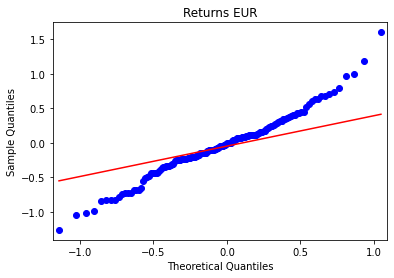

Q-Q Plot for Returns JPY


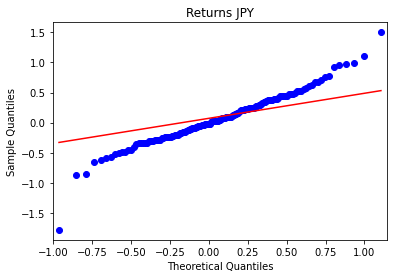

Q-Q Plot for Returns RUB


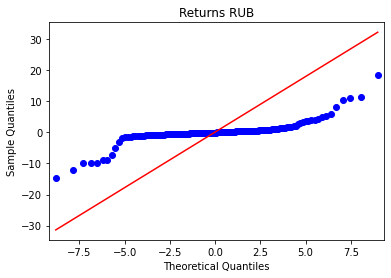

Q-Q Plot for Returns CHF


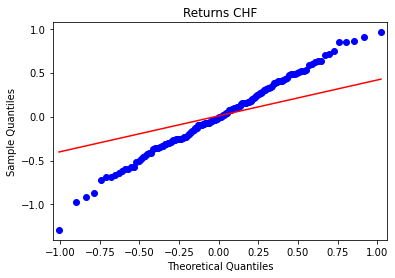

Q-Q Plot for Returns CNY


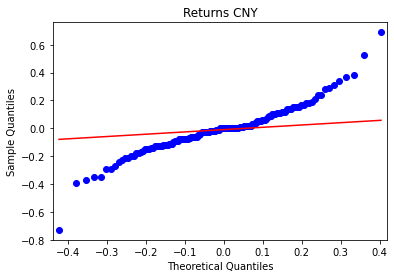

Q-Q Plot for Returns TRY


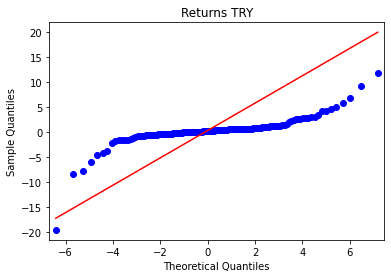

Q-Q Plot for Returns GBP


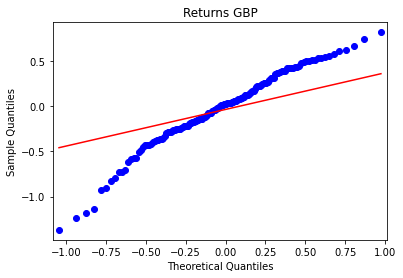

Q-Q Plot for Returns SAR


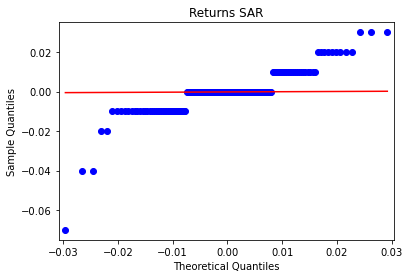

Q-Q Plot for Returns CAD


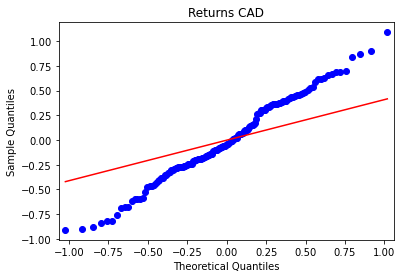

Q-Q Plot for Returns AUD


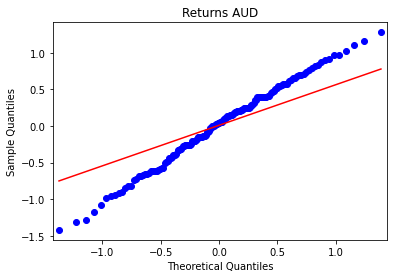

Q-Q Plot for Returns BTC


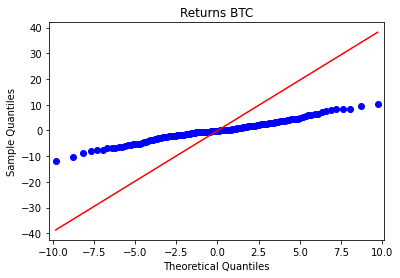

Q-Q Plot for Returns ETH


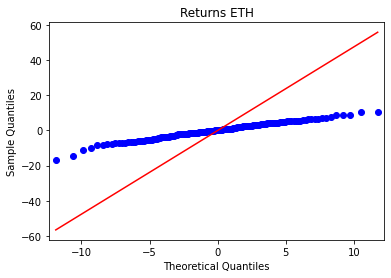

Q-Q Plot for Returns BNB


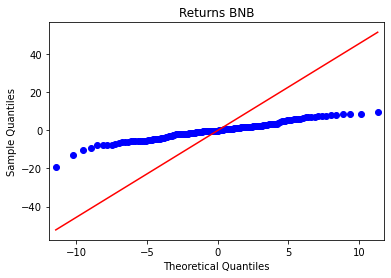

Q-Q Plot for Returns ADA


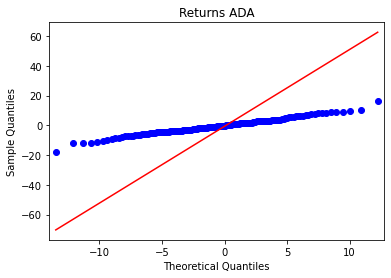

Q-Q Plot for Returns SOL


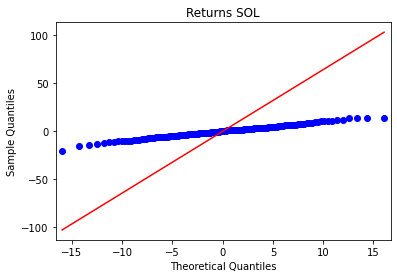

Q-Q Plot for Returns XRP


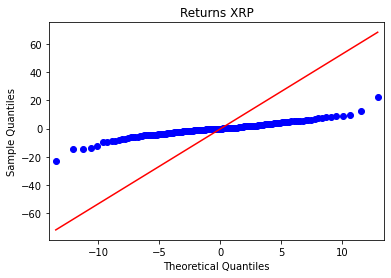

Q-Q Plot for Returns BFNX


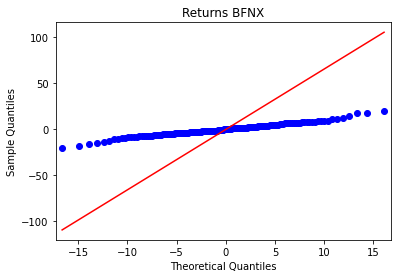

Q-Q Plot for Returns DOGE


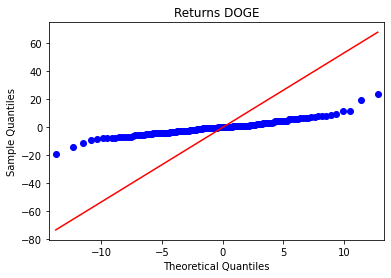

Q-Q Plot for Returns LTC


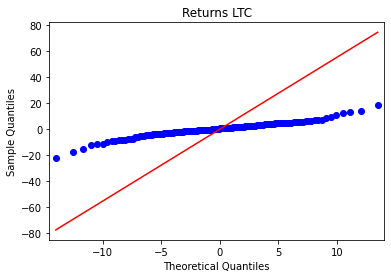

Q-Q Plot for Returns POLY


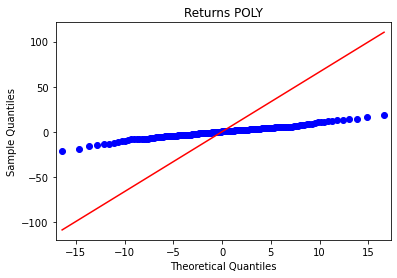

In [164]:
#Q-Q Plot
import statsmodels.api as sm
import pylab
import statistics 


for col in df_returns.iteritems(): 
    print('Q-Q Plot for '+col[0])
    indicator=df_returns[col[0]]
    mean1=statistics.mean(indicator) 
    st_dev1=statistics.stdev(indicator)
    obs_count1=len(indicator)
    sm.qqplot(indicator, loc = mean1, scale = st_dev1, line='s')
    plt.title(col[0])
    plt.show()


boxplot for Returns EUR


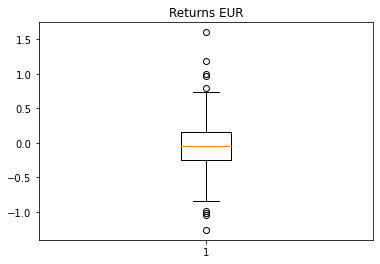

boxplot for Returns JPY


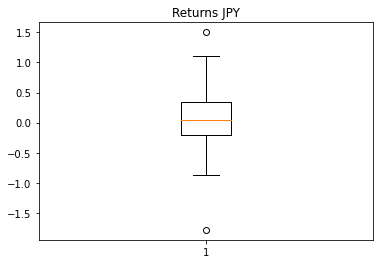

boxplot for Returns RUB


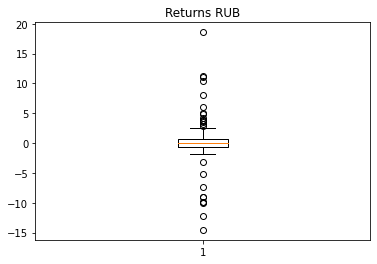

boxplot for Returns CHF


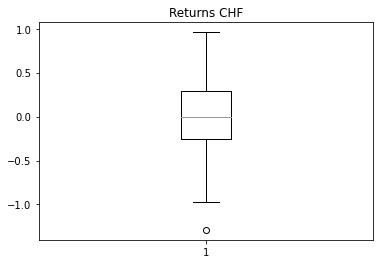

boxplot for Returns CNY


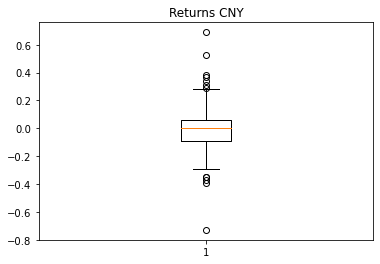

boxplot for Returns TRY


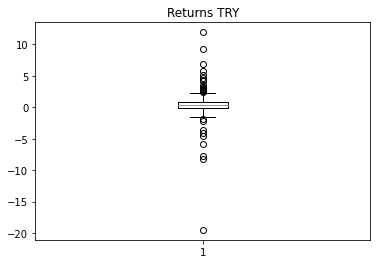

boxplot for Returns GBP


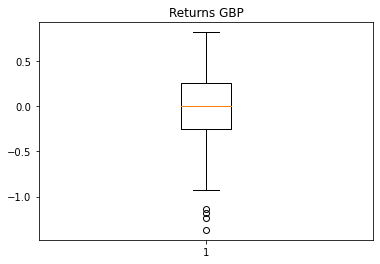

boxplot for Returns SAR


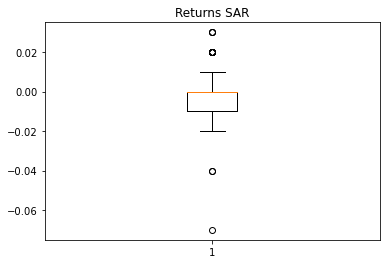

boxplot for Returns CAD


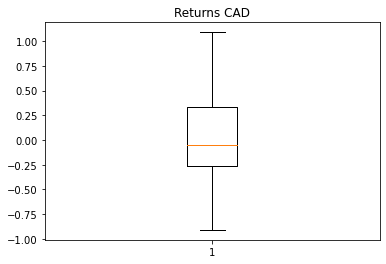

boxplot for Returns AUD


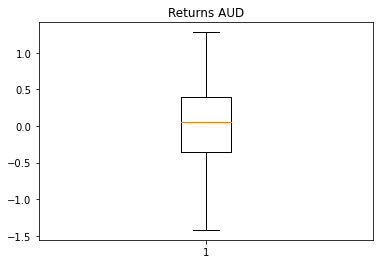

boxplot for Returns BTC


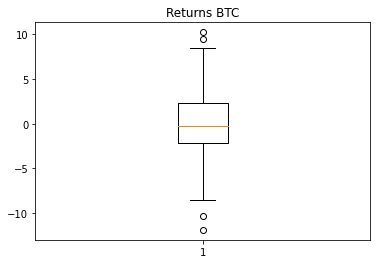

boxplot for Returns ETH


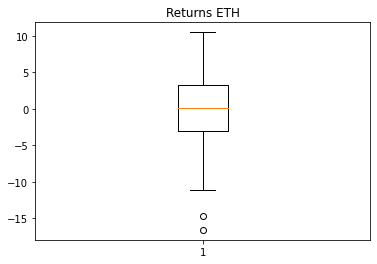

boxplot for Returns BNB


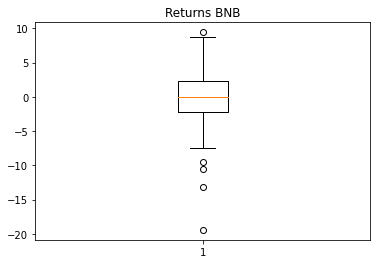

boxplot for Returns ADA


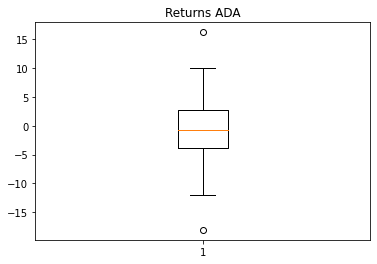

boxplot for Returns SOL


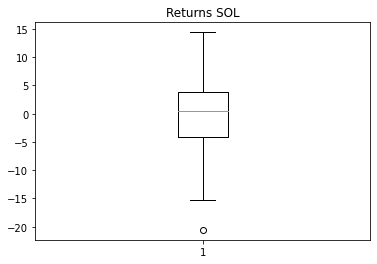

boxplot for Returns XRP


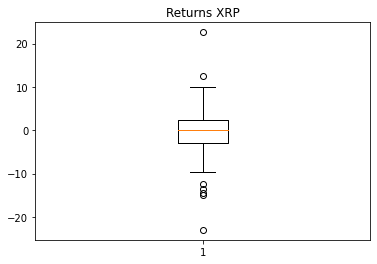

boxplot for Returns BFNX


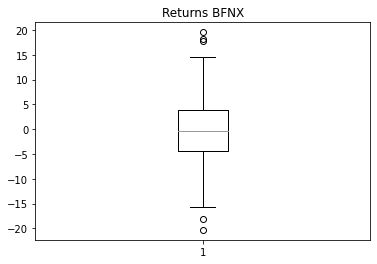

boxplot for Returns DOGE


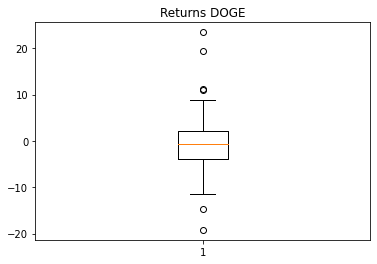

boxplot for Returns LTC


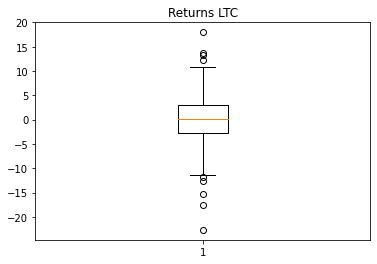

boxplot for Returns POLY


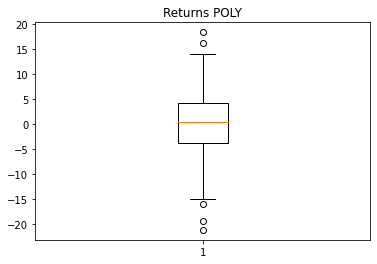

In [168]:
#boxplot for col

for col in df_returns.iteritems(): 
    print('boxplot for '+col[0])
    fig, ax = plt.subplots()
    indicator=df_returns[col[0]]
    ax.boxplot(indicator)
    plt.title(col[0])
    plt.show()

In [169]:
#Shapiro-Wilk Normality Test

for col in df_returns.iteritems(): 
    indicator=df_returns[col[0]]
    stat,p=stats.shapiro(indicator)
    print("p-value for Shapiro-Wilk "+col[0]+":")
    print(p)
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk Returns EUR:
0.033854201436042786
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns JPY:
0.0026895287446677685
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns RUB:
9.674851616394797e-16
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns CHF:
0.9059861898422241
Sample looks Gaussian (fail to reject H0)
p-value for Shapiro-Wilk Returns CNY:
2.5349429506604793e-06
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns TRY:
1.5683983659182786e-16
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns GBP:
0.0033762124367058277
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns SAR:
7.447898092531602e-13
Sample does not look Gaussian (reject H0)
p-value for Shapiro-Wilk Returns CAD:
0.31367677450180054
Sample looks Gaussian (fail to reject H0)
p-value for Shapiro-Wilk Returns AUD:
0.6061010956764221
Sample looks Gaussian (fail t

In [ ]:
# Of the selected currencies, 9 are normally distributed and 11 are not normally distributed.
# normally distributed are: CHF, CUD, AUD, BTC, ETH, ADA, SOL, BFNX, POLY -> 3 currencies, 6 cryptos
# not normally distributed are: EUR, JPY, RUB, CNY, TRY, GBP, SAR, BNB, XRP, DOGE, LTC -> 7 currencies, 4 cryptos

# Stationarity / Dickey-Fuller-Test

In [177]:
for i in df_prices:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(df_prices[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(df_prices[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
EUR in Level 
 ADF Stat (Library) for EUR : -1.42 
 ADF P-Val (Library) EUR : 0.14 

EUR in 1st Difference 
 ADF Stat (Library) for EUR : -9.73 
 ADF P-Val (Library) EUR : 0.00 

Number of lags used: 2
EUR in Level 
 ADF Stat (Library) for EUR : -1.56 
 ADF P-Val (Library) EUR : 0.11 

EUR in 1st Difference 
 ADF Stat (Library) for EUR : -7.45 
 ADF P-Val (Library) EUR : 0.00 

____________________________________________ 

Number of lags used: 1
JPY in Level 
 ADF Stat (Library) for JPY : 2.05 
 ADF P-Val (Library) JPY : 0.99 

JPY in 1st Difference 
 ADF Stat (Library) for JPY : -7.92 
 ADF P-Val (Library) JPY : 0.00 

Number of lags used: 2
JPY in Level 
 ADF Stat (Library) for JPY : 1.98 
 ADF P-Val (Library) JPY : 0.99 

JPY in 1st Difference 
 ADF Stat (Library) for JPY : -6.83 
 ADF P-Val (Library) JPY : 0.00 

____________________________________________ 

Number of lags used: 1
RUB in Level 
 ADF Stat (Library) for RUB : -0.10 
 ADF P-Val (Library) RUB :

In [ ]:
# Of the selected currencies, all priceseries are nonstationary at the 5% CI except two cryptos ADA and DOGE
# The prices of ADA are stationary with one lag (P-VAL 0.01) and with two lags (P-VAL 0.01)
# The prices of DOGE are nonstationary with one lag (P-VAL 0.09) and stationary with two lags (P-VAL 0.04)
# Of the selected currencies, all pricereturns are stationary (P-VAL < 0.00)

In [13]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in df_prices:
        adf_library = adfuller(df_prices[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(df_prices[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Prices (Level)
EUR : 0.14
JPY : 0.99
RUB : 0.65
CHF : 0.76
CNY : 0.34
TRY : 0.90
GBP : 0.24
SAR : 0.77
CAD : 0.67
AUD : 0.70
BTC : 0.54
ETH : 0.49
BNB : 0.52
ADA : 0.01
SOL : 0.49
XRP : 0.20
BFNX : 0.38
DOGE : 0.09
LTC : 0.24
POLY : 0.60
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
EUR : 0.11
JPY : 0.99
RUB : 0.65
CHF : 0.76
CNY : 0.25
TRY : 0.91
GBP : 0.24
SAR : 0.75
CAD : 0.66
AUD : 0.73
BTC : 0.50
ETH : 0.48
BNB : 0.50
ADA : 0.01
SOL : 0.45
XRP : 0.12
BFNX : 0.35
DOGE : 0.04
LTC : 0.19
POLY : 0.54
____________________________________________ 



In [12]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in df_prices:
        adf_library = adfuller(df_prices[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(df_prices[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Absolute Returns (1st Difference)
EUR : 0.00
JPY : 0.00
RUB : 0.00
CHF : 0.00
CNY : 0.00
TRY : 0.00
GBP : 0.00
SAR : 0.00
CAD : 0.00
AUD : 0.00
BTC : 0.00
ETH : 0.00
BNB : 0.00
ADA : 0.00
SOL : 0.00
XRP : 0.00
BFNX : 0.00
DOGE : 0.00
LTC : 0.00
POLY : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for Absolute Returns (1st Difference)
EUR : 0.00
JPY : 0.00
RUB : 0.00
CHF : 0.00
CNY : 0.00
TRY : 0.00
GBP : 0.00
SAR : 0.00
CAD : 0.00
AUD : 0.00
BTC : 0.00
ETH : 0.00
BNB : 0.00
ADA : 0.00
SOL : 0.00
XRP : 0.00
BFNX : 0.00
DOGE : 0.00
LTC : 0.00
POLY : 0.00
____________________________________________ 



# Scatterplots

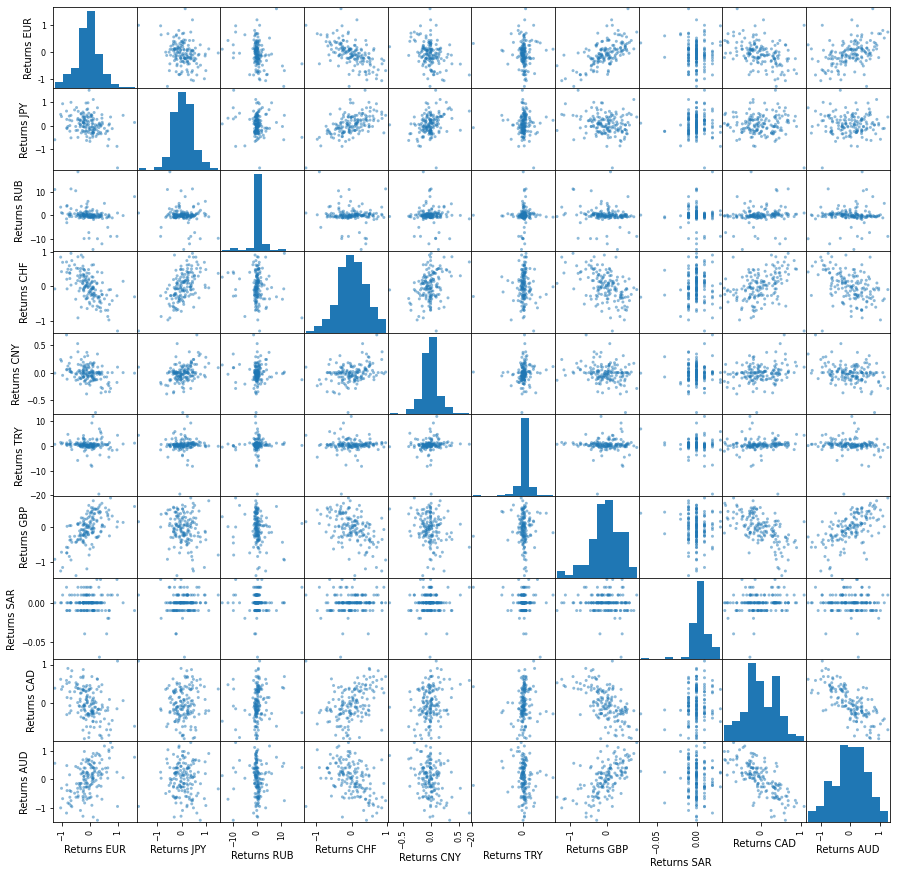

In [53]:
pd.plotting.scatter_matrix(df_returns.iloc[:,0:10],figsize=(15,15))
plt.show()

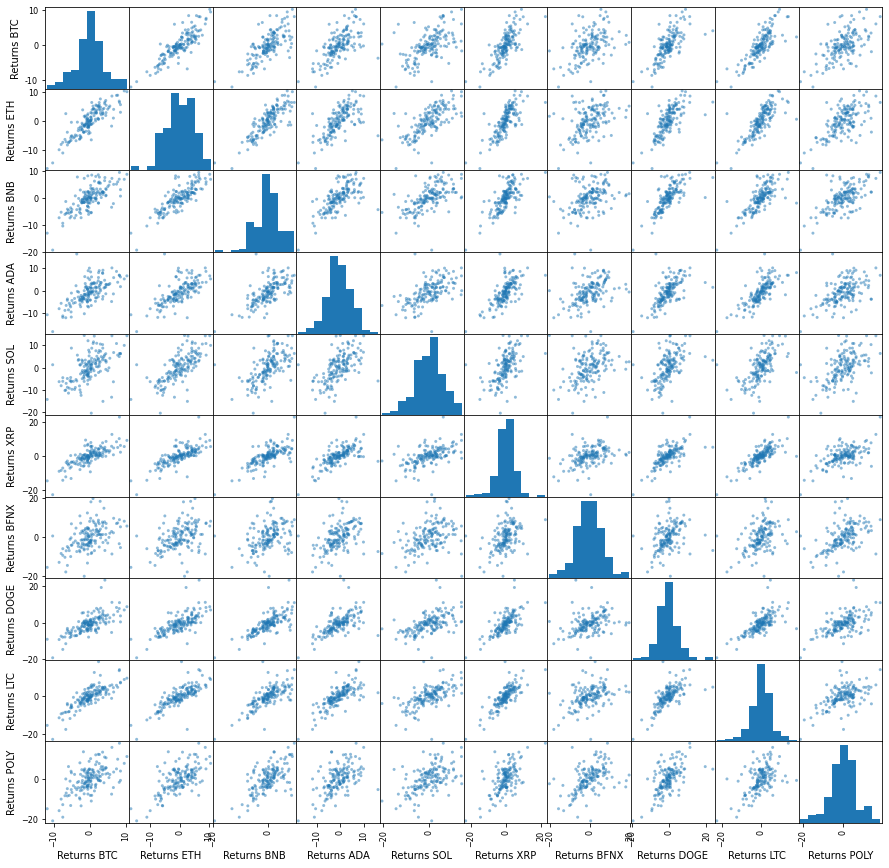

In [54]:
pd.plotting.scatter_matrix(df_returns.iloc[:,10:20], figsize=(15,15))
plt.show()

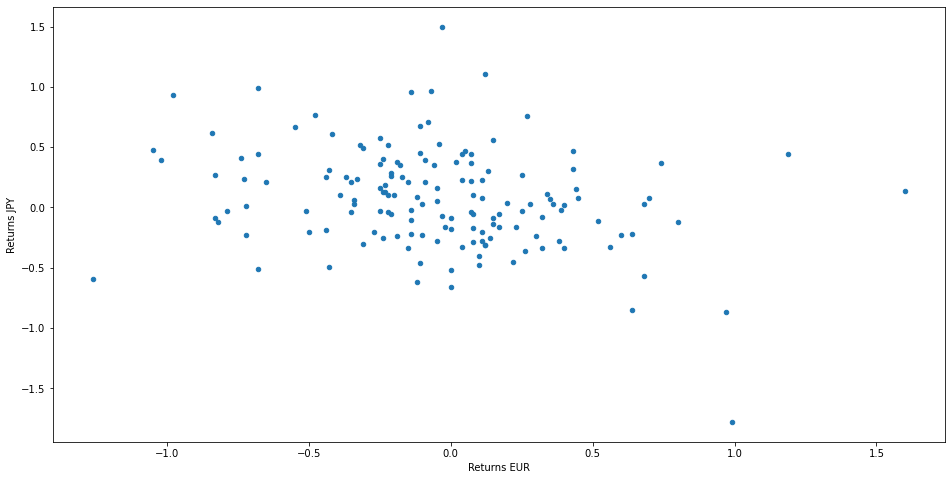

In [60]:
df_returns.plot(x='Returns EUR',
               y='Returns JPY',
               kind='scatter',
              figsize=(16,8))
plt.show()

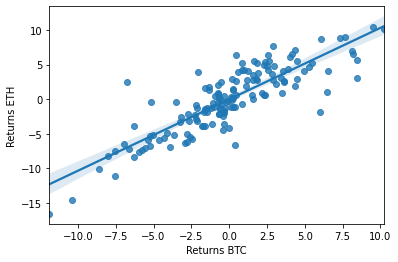

In [65]:
sns.regplot(x='Returns BTC', y='Returns ETH',data=df_returns)
plt.show()

In [ ]:
# The scatterplots show that a lower correlation is to be expected for the classic currencies than for the cryptocurrencies. 

# Cointegration Part 1

In [50]:
columns_names=df_prices.columns

In [51]:
columns_names

Index(['EUR', 'JPY', 'RUB', 'CHF', 'CNY', 'TRY', 'GBP', 'SAR', 'CAD', 'AUD',
       'BTC', 'ETH', 'BNB', 'ADA', 'SOL', 'XRP', 'BFNX', 'DOGE', 'LTC',
       'POLY'],
      dtype='object')

In [54]:
var_list=list(columns_names.values)

In [55]:
var_list

['EUR',
 'JPY',
 'RUB',
 'CHF',
 'CNY',
 'TRY',
 'GBP',
 'SAR',
 'CAD',
 'AUD',
 'BTC',
 'ETH',
 'BNB',
 'ADA',
 'SOL',
 'XRP',
 'BFNX',
 'DOGE',
 'LTC',
 'POLY']

In [89]:
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.coint.html
#import warnings
#warnings.simplefilter('ignore')
import statsmodels.api as sm

df_prices['Constant']= 1

x_list=var_list
y_list = var_list
max_lags=5
counter_total=1
counter_lib_ECMLib=1
counter_lib_ECMLib_n_Coded=1

print('Number of identified cointegrations using the ECM Library by asset: ')

for y_name in y_list:  
    
    y=df_prices[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset=0
    lags_success=[]
    R2_success=[]
    
    for lags in range(0,max_lags,1):
    
        for i in x_list:
            
            if not y_name==i :
                counter_total=counter_total+1
                counter_total_byasset=counter_total_byasset+1
                
                x_nc=df_prices[i]
                x=df_prices[[i,'Constant']]
                
                if y.shape>x_nc.shape: 
                    temp=y.drop(y.index[0])
                    y=temp
                elif y.shape<x_nc.shape:
                    temp=x_nc.drop(x_nc.index[0])
                    d_i=temp
                if x_nc.shape != y.shape: print('Warning Data Problem: Y',y.shape, 'X:', x_nc.shape)
            
                #Step 1: Stationarity Tests for the Residual between Y  and other variables
                
                step1_myols=OLS(y,x)
                step1_est_resid = step1_myols['est_resid']
                
                #x_res=x_nc
                #x_res['res']=step1_est_resid

                #adf_coded=Augm_DF(step1_est_resid,lags)
                adf_library = adfuller(step1_est_resid, maxlag=lags, regression='nc',autolag=None)
                
                #Step 2
                #d_y=pd.DataFrame(np.diff(data[y_name])) 
                d_y=y.diff()[1:]
                d_i=x_nc.diff()[1:]
                #d_i=pd.concat(x_nc.diff()[1:],step1_est_resid[1:])
                #res=pd.DataFrame(step1_est_resid.shift(1))
                #d_i['res']=res[1:]
                
                d_i_res=pd.concat([x_nc.diff()[1:], step1_est_resid.shift(1)[1:]], axis=1)
                d_i_res.columns=[i,'est_res_1']
                
                if d_y.shape[0] != d_i_res.shape[0]: print('Warning Data Problem: dY',d_y.shape[0], 'dX_rres:', d_i_res.shape[0])
                
                #ECM = OLS(d_y,d_i_res) # self-coded
                ECM_results_lib = sm.tsa.stattools.coint(y,df_prices[i],trend='c',maxlag=lags) # library


                if ECM_results_lib[1]<0.1:
                    #print (counter_total,'. Regressing ',i,' on',y_name,'number of lags used:',lags,', No Constant''\n')

                    #print('ECM Statistics with constant, no trend (Cointegration Library)','\n','H0: No Cointegrating Relationship','\n','T-Statistic of unit-root test on residuals: ',"%.2f" % ECM_results_lib[0],'\n','P-value for the cointegrating relationship: ',"%.2f" % ECM_results_lib[1],'\n')
                    #print('--> Cointegration confirmed ',i,'and',y_name,'max lags: ',lags)
                    counter_lib_ECMLib=counter_lib_ECMLib+1
                    
                    OLS_results_lib = sm.OLS(d_y,d_i_res,hasconst=None).fit()
                    OLS_results_code = OLS(d_y,d_i_res)
                    
                    #print(OLS_results_lib.summary(),'\n')
                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1
                    lags_success.append(lags)
                    R2_success.append(OLS_results_code['R_2'])
                
#                    if adf_library[1]<0.1: 
                        #print('Step 1: Residual proved stationary --> long-run relationship can exist')
                        #print('Residual stationarity test','\n','ADF Stat (Self-Coded) :',"%.2f" % adf_coded['t_stats'][0],'\n','ADF Stat (Standard ADF Library) :',"%.2f" % adf_library[0],'\n','ADF P-Val (Self-Coded) :', "%.2f" % adf_coded['ADF_pval'],'\n','ADF P-Val (Standard ADF Library) :',"%.2f" %  adf_library[1],'\n')
#                        if ECM['pvals'][0]<0.1:

                            #print('Step 2: Residual proved significant --> long-run relationship exists','\n')
                            #print('ECM (Self-Coded)','\n','ECM P-Val for (1-Alpha )', "%.3f" % ECM['pvals'][0],'\n')
 #                           counter_lib_ECMLib_n_Coded=counter_lib_ECMLib_n_Coded+1
                        #else: 
                            #print('Step 2: Residual proved non-significant --> long-run relationship does not exist','\n')

                    #else:
                        #print('Step 1: Residual proved non-stationary --> long-run relationship can not exist','\n')
                        #print('Residual stationarity test','\n','ADF Stat (Self-Coded) :',"%.2f" % adf_coded['t_stats'][0],'\n','ADF Stat (Standard ADF Library) :',"%.2f" % adf_library[0],'\n','ADF P-Val (Self-Coded) :', "%.2f" % adf_coded['ADF_pval'],'\n','ADF P-Val (Standard ADF Library) :',"%.2f" %  adf_library[1],'\n')
                    #print('______________________________________________________________________________________','\n')
            
    print(y_name,':',counter_lib_ECMLib_success_temp,'out of total',counter_total_byasset,'¦cointegration identified at ADF lags:'
          ,lags_success)
    
    
    
print('\n','total number of regressions conducted:',counter_total-1)
print('total number of identified cointegrations using only ECM Library:',counter_lib_ECMLib-1)
print('total number of identified cointegrations using both ECM Library and own code:',counter_lib_ECMLib_n_Coded-1)
                

Number of identified cointegrations using the ECM Library by asset: 
EUR : 10 out of total 95 ¦cointegration identified at ADF lags: [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
JPY : 0 out of total 95 ¦cointegration identified at ADF lags: []
RUB : 1 out of total 95 ¦cointegration identified at ADF lags: [4]
CHF : 95 out of total 95 ¦cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
CNY : 15 out of total 95 ¦cointegration identified at ADF lags: [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
TRY : 20 out of total 95 ¦cointegration identified at ADF lags: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
GBP : 0 out of total 95 ¦cointegration identified at ADF lags: []
SAR : 5 out of total 95 ¦cointegration identified at

In [ ]:
# Among the classic currencies, the Swiss franc has the most cointegrations with other currencies over the observation period (95 out of 95).  This is followed by the Turkish lira (20 out of 95). In third place is the Chinese yuan (15 out of 95). In third place is the Chinese yuan (20 out of 95). The fewest cointegrations were observed with the Canadian dollar, the Australian dollar and the Japanese yen (0 out of 95 each). Among cryptocurrencies, Ripple has the most cointegrations (36 out of 95), followed by Solana (19 out of 95). In third place are Cardano and Dogecoin (18 out of 95 each). The least number of cointegrations was observed for the Finance Coin (2 out of 95). Etherum has the second fewest cointegrations (5 out of 95). Bitcoin and Matic have the third fewest cointegrations (6 out of 95 each).
# This is followed by the Turkish lira (20 out of 95). In third place is the Chinese yuan (15 out of 95). In third place is the Chinese yuan (20 out of 95). The fewest cointegrations were observed with the Canadian dollar, the Australian dollar and the Japanese yen (0 out of 95 each). Among cryptocurrencies, Ripple has the most cointegrations (36 out of 95), followed by Solana (19 out of 95). In third place are Cardano and Dogecoin (18 out of 95 each). The least number of cointegrations was observed for the Finance Coin (2 out of 95). Etherum has the second fewest cointegrations (5 out of 95). Bitcoin and Matic have the third fewest cointegrations (6 out of 95 each).
# In third place is the Chinese yuan (15 out of 95).
# The fewest cointegrations were observed with the Canadian dollar, the Australian dollar and the Japanese yen (0 out of 95 each)

# Among cryptocurrencies, Ripple has the most cointegrations (36 out of 95), followed by Solana (19 out of 95).
# In third place are Cardano and Dogecoin (18 out of 95 each). 
# The least number of cointegrations was observed for the Binance Coin (2 out of 95)
# Etherum has the second fewest cointegrations (5 out of 95).
# Bitcoin and Matic have the third fewest cointegrations (6 out of 95 each).

# Cointegraiton Part 2

In [117]:
#Hedge Ratio
import statsmodels.api as sm
ReturnsBTC=df_returns['Returns BTC']
ReturnsETH=df_returns['Returns ETH']
model = sm.OLS(ReturnsETH, ReturnsBTC)
model = model.fit() 
print(model.params[0])

1.0343983717380196


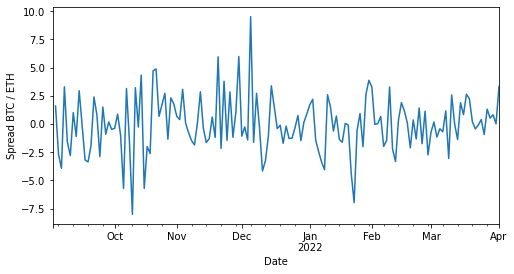

In [122]:
#Spread
df['spread_BTC_ETH'] = df_returns['Returns ETH'] - model.params[0] * df_returns['Returns BTC']
# Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread BTC / ETH")
plt.show()

In [123]:
spread_BTC_ETH=df['spread_BTC_ETH']
spread_BTC_ETH

Date
2021-09-02         NaN
2021-09-03    1.599410
2021-09-06   -2.670050
2021-09-07   -3.923289
2021-09-08    3.295381
                ...   
2022-03-28    1.317172
2022-03-29    0.526462
2022-03-30    0.822727
2022-03-31    0.012483
2022-04-01    3.320417
Name: spread_BTC_ETH, Length: 152, dtype: float64

In [124]:
# To perform ADF Test for spread BTC / ETH
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df[['spread_BTC_ETH']][1:], maxlag = 1, )
print('ADF Statistic:  %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic:  -12.466921
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


In [ ]:
# Conclusion: Since -12.47 < -3.48, the spread is stationary and BTC & ETH are cointegrated with more than 99% certainty

In [15]:
ReturnsEUR=df_returns['Returns EUR']
ReturnsCHF=df_returns['Returns CHF']
model = sm.OLS(ReturnsEUR, ReturnsCHF)
model = model.fit() 
print(model.params[0])

-0.623604681197719


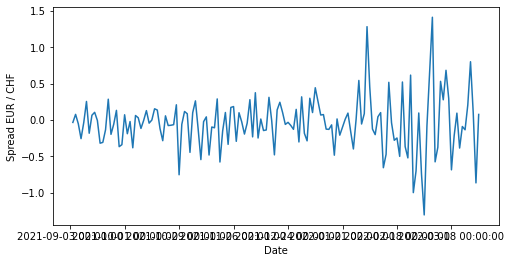

In [16]:
#Spread
df['spread_EUR_CHF'] = df_returns['Returns EUR'] - model.params[0] * df_returns['Returns CHF']
# Plot the spread
df.spread_EUR_CHF.plot(figsize=(8,4))
plt.ylabel("Spread EUR / CHF")
plt.show()

In [17]:
# To perform ADF Test for Spread EUR / CHF
# Compute ADF test statistics
adf = adfuller(df[['spread_EUR_CHF']][1:], maxlag = 1, )
print('ADF Statistic:  %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic:  -10.696806
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


In [ ]:
# Conclusion: Since -10.7 < -3.48, the spread is stationary and EUR & CHF are cointegrated with more than 99% certainty

In [18]:
ReturnsEUR=df_returns['Returns EUR']
ReturnsBTC=df_returns['Returns BTC']
model = sm.OLS(ReturnsEUR, ReturnsBTC)
model = model.fit() 
print(model.params[0])

0.017428951318893417


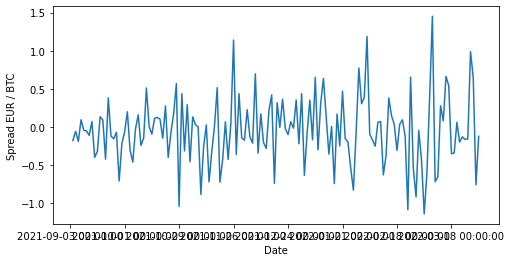

In [19]:
#Spread
df['spread_EUR_BTC'] = df_returns['Returns EUR'] - model.params[0] * df_returns['Returns BTC']
# Plot the spread
df.spread_EUR_BTC.plot(figsize=(8,4))
plt.ylabel("Spread EUR / BTC")
plt.show()

In [20]:
# To perform ADF Test for Spread EUR / CHF
# Compute ADF test statistics
adf = adfuller(df[['spread_EUR_BTC']][1:], maxlag = 1, )
print('ADF Statistic:  %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic:  -9.861851
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


In [ ]:
# Conclusion: Since -9.86 < -3.48, the spread is stationary and EUR & BTC are cointegrated with more than 99% certainty

In [ ]:
ReturnsEUR=df_returns['Returns EUR']
ReturnsBTC=df_returns['Returns BTC']
model = sm.OLS(ReturnsEUR, ReturnsBTC)
model = model.fit() 
print(model.params[0])